<a href="https://colab.research.google.com/github/Jency07/Deep-learning-lab/blob/main/2D_Convolutions_20MAI0026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ACTIVITY 2 - IMPLEMENTING 2D CONVOLUTIONS***

**1. Importing libraries**

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


**2. Implementation of 2D Convolution**

In [2]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output


**3. Implementation of Entropy Calculation**

In [3]:
#Calculate information entropy
def entropy(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()




**4. Mounting the Gdrive**

In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**5. Loading the image**


 Roll No: 20MAI0026

********************



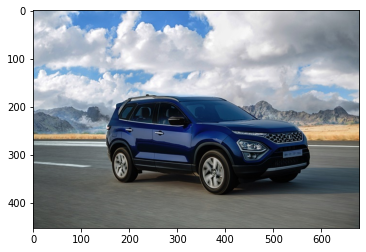

In [5]:
print("\n Roll No: 20MAI0026")
print("\n********************\n")

#Read the image
image = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/image.jpg') 
#Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

**6. Conversion of image to grayscale**


 Roll No: 20MAI0026

********************



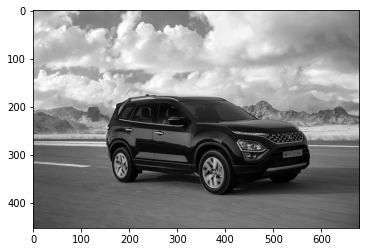

In [6]:
print("\n Roll No: 20MAI0026")
print("\n********************\n")

# Convert image to grayscale. The second argument cv2.COLOR_BGR2GRAY,converts colour image to grayscale.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# as opencv loads in BGR format by default, so convert to RGB.
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

**7. Applying box filters and entropy calculation**

###***ia. Filter with size 3x3 and default stride***



*   The default stride value is 1




 Roll No: 20MAI0026

********************


Entropy of original image: 7.8115628579684655

Entropy of gray image: 7.826811915286669

Entropy of filtered image of size 3x3: 10.982146648153343

 Shape of the input image: 

(453, 680)

 Shape of the filtered image:

(451, 678)


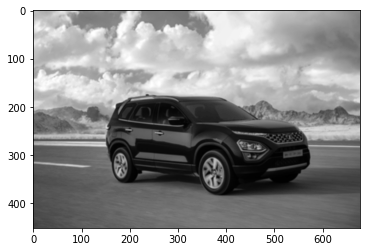

In [7]:
print("\n Roll No: 20MAI0026")
print("\n********************\n")

# Design filter
filter = np.array([[ 1, 1, 1], 
                   [ 1, 1, 1], 
                   [ 1, 1, 1]])
# Convolve and Save Output
output = convolve2D(gray, filter, padding=0)

#Entropy Calculations
print("\nEntropy of original image: "+ str(entropy(image,2)))
print("\nEntropy of gray image: "+ str(entropy(gray,2)))
print("\nEntropy of filtered image of size 3x3: "+str(entropy(output,2)))

#Shape of the input image
print("\n Shape of the input image: \n")
print(gray.shape)
#Shape of the output image
print("\n Shape of the filtered image:\n")
print(output.shape)

# Display filtered image
plt.imshow(output, cmap='gray')




**Observation:**


By using a filter size of 3x3 and default stride,
*   Information from outermost 2 rows(1 top row & 1 bottom row) and 2 columns (1 left column & 1 right column) are lost
*   Entropy of input image is 7.81
*   Entropy of filtered image is 10.98


---






###***ib. Filter with size 5x5 and default stride***



*   The default stride value is 1




 Roll No: 20MAI0026

********************


Entropy of original image: 7.8115628579684655

Entropy of gray image: 7.826811915286669

Entropy of filtered image of size 5x5: 12.451284273451833

Shape of the input image: (453, 680)

Shape of the filtered image: (449, 676)




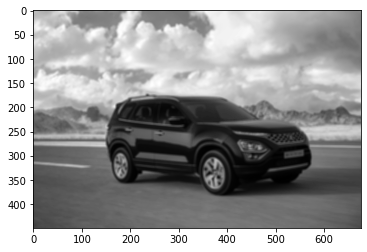

In [8]:
print("\n Roll No: 20MAI0026")
print("\n********************\n")

# Design filter
filter = np.array([[ 1, 1, 1,1,1], 
                   [ 1, 1, 1,1,1], 
                   [ 1, 1, 1,1,1],
                   [ 1, 1, 1,1,1],
                   [ 1, 1, 1,1,1]])
# Convolve and Save Output
output = convolve2D(gray, filter, padding=0)
print("\nEntropy of original image: "+ str(entropy(image,2)))
print("\nEntropy of gray image: "+ str(entropy(gray,2)))
print("\nEntropy of filtered image of size 5x5: "+str(entropy(output,2)))

# Display filtered image
plt.imshow(output, cmap='gray')

#Shape of the input image
print("\nShape of the input image: ",end ="")
print(gray.shape)
#Shape of the output image
print("\nShape of the filtered image: ",end ="")
print(output.shape)
print("\n")

**Observation:**


By using a filter size of 5x5 and default stride,
*   Information from outermost 4 rows(2 top row & 2 bottom row) and 4 columns (2 left column & 2 right column) are lost
*   Entropy of input image is 7.811
*   Entropy of filtered image is 12.45


---






###***iia). Filter with size 3x3 and stride 2***


 Roll No: 20MAI0026

********************


Entropy of original image: 7.8115628579684655

Entropy of gray image: 7.826811915286669

Entropy of filtered image of size 3x3: 3.4331002889762248

Shape of the input image: (453, 680)

Shape of the filtered image: (226, 339)




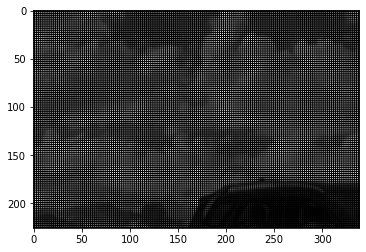

In [9]:
print("\n Roll No: 20MAI0026")
print("\n********************\n")

# Design filter
filter = np.array([[ 1, 1, 1], 
                   [ 1, 1, 1], 
                   [ 1, 1, 1]])
# Convolve and Save Output
output = convolve2D(gray, filter, padding=0,strides=2)
print("\nEntropy of original image: "+ str(entropy(image,2)))
print("\nEntropy of gray image: "+ str(entropy(gray,2)))
print("\nEntropy of filtered image of size 3x3: "+str(entropy(output,2)))

# Display filtered image
plt.imshow(output, cmap='gray')

#Shape of the input image
print("\nShape of the input image: ",end ="")
print(gray.shape)
#Shape of the output image
print("\nShape of the filtered image: ",end ="")
print(output.shape)
print("\n")

**Observation:**


By using a filter size of 3x3 and stride=2,
*   Information from outermost 227 rows and 341 columns are lost. ***Loss of information is high as stride increases for a filter of fixed sixe.***
*   Entropy of input image is 7.81
*   Entropy of filtered image is 3.43


---






###***iib). Filter with size 5x5 and stride 2***


 Roll No: 20MAI0026

********************


Entropy of original image: 7.8115628579684655

Entropy of gray image: 7.826811915286669

Entropy of filtered image of size 5x5: 3.767350218788943



Shape of the input image: (453, 680)

Shape of the filtered image: (225, 338)




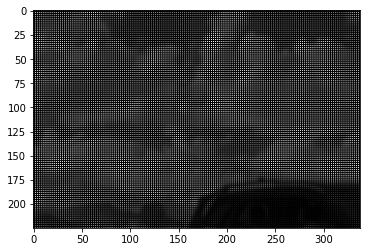

In [10]:
print("\n Roll No: 20MAI0026")
print("\n********************\n")

# Design filter
filter = np.array([[ 1, 1, 1,1,1], 
                   [ 1, 1, 1,1,1], 
                   [ 1, 1, 1,1,1],
                   [ 1, 1, 1,1,1],
                   [ 1, 1, 1,1,1]])
# Convolve and Save Output
output = convolve2D(gray, filter, padding=0,strides=2)
print("\nEntropy of original image: "+ str(entropy(image,2)))
print("\nEntropy of gray image: "+ str(entropy(gray,2)))
print("\nEntropy of filtered image of size 5x5: "+str(entropy(output,2)))
print("\n")

# Display filtered image
plt.imshow(output, cmap='gray')

#Shape of the input image
print("\nShape of the input image: ",end ="")
print(gray.shape)
#Shape of the output image
print("\nShape of the filtered image: ",end ="")
print(output.shape)
print("\n")

**Observation:**


By using a filter size of 5x5 and default stride,
*   Information from outermost 228 rows and 342 columns are lost. ***Loss of information is high as stride increases for a filter of fixed sixe.***
*   Entropy of input image is 7.811
*   Entropy of filtered image is 3.76


---






###***iiia). Filter with size 3x3, stride 1 and with zero padding***


 Roll No: 20MAI0026

********************


Entropy of original image: 7.8115628579684655

Entropy of gray image: 7.826811915286669

Entropy of filtered image of size 3x3: 10.966204626437667

Shape of the input image: (453, 680)

Shape of the filtered image: (453, 680)




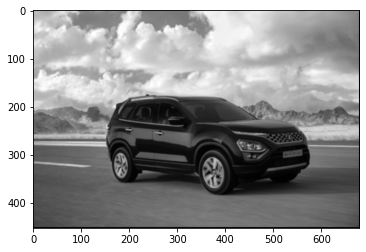

In [11]:
print("\n Roll No: 20MAI0026")
print("\n********************\n")

# Design filter
filter = np.array([[ 1, 1, 1], 
                   [ 1, 1, 1], 
                   [ 1, 1, 1]])
# Convolve and Save Output
output = convolve2D(gray, filter,padding =1,strides=1)
print("\nEntropy of original image: "+ str(entropy(image,2)))
print("\nEntropy of gray image: "+ str(entropy(gray,2)))
print("\nEntropy of filtered image of size 3x3: "+str(entropy(output,2)))

# Display filtered image
plt.imshow(output, cmap='gray')

#Shape of the input image
print("\nShape of the input image: ",end ="")
print(gray.shape)
#Shape of the output image
print("\nShape of the filtered image: ",end ="")
print(output.shape)
print("\n")

**Observation:**


By using a filter size of 3x3 with zero padding and stride=1,
*   Filter has been applied to all the pixels including the edge pixels as zero padding is used
*   Entropy of input image is 7.81
*   Entropy of filtered image is 10.96


---






###***iiib). Filter with size 5x5,stride 1 and with zero padding***


 Roll No: 20MAI0026

********************


Entropy of original image: 7.8115628579684655

Entropy of gray image: 7.826811915286669

Entropy of filtered image of size 5x5: 12.382798010030196



Shape of the input image: (453, 680)

Shape of the filtered image: (453, 680)




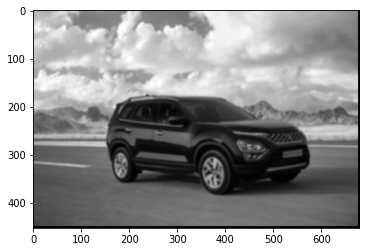

In [12]:
print("\n Roll No: 20MAI0026")
print("\n********************\n")

# Design filter
filter = np.array([[ 1, 1, 1,1,1], 
                   [ 1, 1, 1,1,1], 
                   [ 1, 1, 1,1,1],
                   [ 1, 1, 1,1,1],
                   [ 1, 1, 1,1,1]])
# Convolve and Save Output
output = convolve2D(gray, filter, padding=2,strides=1)
print("\nEntropy of original image: "+ str(entropy(image,2)))
print("\nEntropy of gray image: "+ str(entropy(gray,2)))
print("\nEntropy of filtered image of size 5x5: "+str(entropy(output,2)))
print("\n")

# Display filtered image
plt.imshow(output, cmap='gray')

#Shape of the input image
print("\nShape of the input image: ",end ="")
print(gray.shape)
#Shape of the output image
print("\nShape of the filtered image: ",end ="")
print(output.shape)
print("\n")

**Observation:**


By using a filter size of 5x5 with zero padding and stride=1,
*   Filter has been applied to all the pixels including the edge pixels as zero padding is used
*   Entropy of input image is 7.81
*   Entropy of filtered image is 12.38







---

---



